In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("../data/processed/ab_test_validated.csv")
primary = pd.read_csv("../data/processed/conversion_results.csv")
secondary = pd.read_csv("../data/processed/secondary_results.csv")
# Compute conversion rate per variant
conversion_summary = df.groupby("variant")["converted"].mean().reset_index()
conversion_summary.rename(columns={"converted": "conversion_rate"}, inplace=True)

# Now conversion_rate exists as a column
conversion_summary

,variant,conversion_rate
0,control,0.098579
1,treatment,0.111205


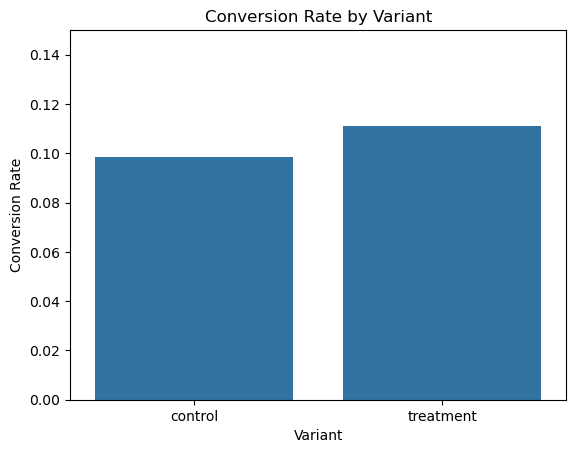

In [5]:
sns.barplot(
    x="variant",
    y="conversion_rate",
    data=conversion_summary
)
plt.title("Conversion Rate by Variant")
plt.ylabel("Conversion Rate")
plt.xlabel("Variant")
plt.ylim(0, 0.15)
plt.show()


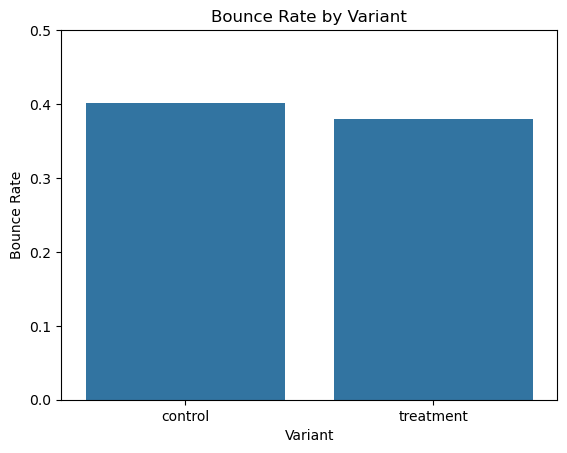

In [6]:
sns.barplot(
    x="variant",
    y="bounced",
    data=df.groupby("variant")["bounced"].mean().reset_index()
)
plt.title("Bounce Rate by Variant")
plt.ylabel("Bounce Rate")
plt.xlabel("Variant")
plt.ylim(0, 0.5)
plt.show()


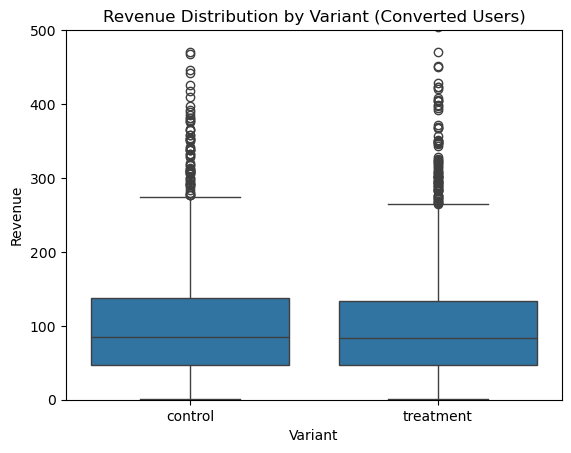

<Figure size 640x480 with 0 Axes>

In [12]:
sns.boxplot(
    x="variant",
    y="revenue",
    data=df[df["converted"]==1]
)
plt.title("Revenue Distribution by Variant (Converted Users)")
plt.ylabel("Revenue")
plt.xlabel("Variant")
plt.ylim(0, 500)  # adjust for better scale
plt.show()
plt.savefig("../reports/rev_dist_by_variant.png")



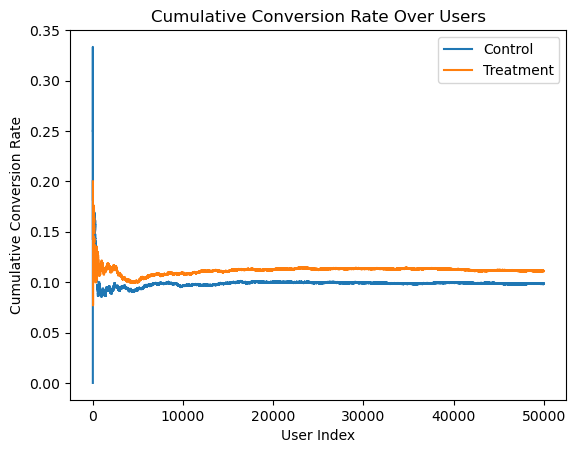

In [8]:
df_sorted = df.sort_values("user_id").reset_index()
df_sorted["cum_conversion_control"] = df_sorted[df_sorted["variant"]=="control"]["converted"].expanding().mean()
df_sorted["cum_conversion_treatment"] = df_sorted[df_sorted["variant"]=="treatment"]["converted"].expanding().mean()

plt.plot(df_sorted.index, df_sorted["cum_conversion_control"], label="Control")
plt.plot(df_sorted.index, df_sorted["cum_conversion_treatment"], label="Treatment")
plt.title("Cumulative Conversion Rate Over Users")
plt.xlabel("User Index")
plt.ylabel("Cumulative Conversion Rate")
plt.legend()
plt.show()


In [9]:
summary = pd.concat([primary, secondary], ignore_index=True)
summary_display = summary[["metric","control","treatment","uplift","p_value"]]

# Display as a table in notebook
from IPython.display import display
display(summary_display)


,metric,control,treatment,uplift,p_value
0,conversion_rate,0.098579,0.111205,0.012626,2.041047e-06
1,bounce_rate,0.401901,0.379739,-0.022162,3.814029e-07
2,avg_revenue,10.022346,11.136829,1.114483,1.362626e-03


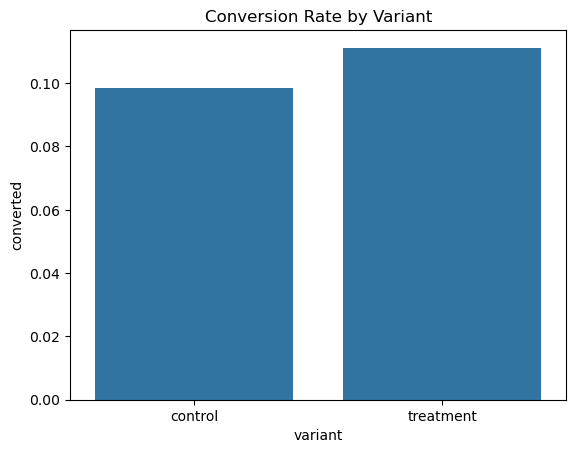

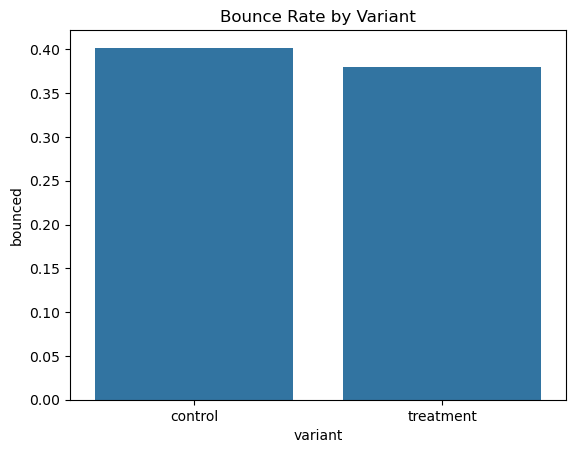

In [10]:
plt.figure()
sns.barplot(x="variant", y="converted", data=df.groupby("variant")["converted"].mean().reset_index())
plt.title("Conversion Rate by Variant")
plt.savefig("../reports/conversion_barplot.png", dpi=300)

plt.figure()
sns.barplot(x="variant", y="bounced", data=df.groupby("variant")["bounced"].mean().reset_index())
plt.title("Bounce Rate by Variant")
plt.savefig("../reports/bounce_barplot.png", dpi=300)
